<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>

(This project study about covid, which is one of the most infectious viruses in history)


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Preprocessing continents dataset|100%
|Nguyễn Huy Hoàn|20127166|Preprocessing countries dataset|100%
|Bùi Thanh Lâm|20127402|Question 1: Which countries have had high newcases recently and find the reason.|100%
|Đào Ngọc Hoa|20127500|I. Data Colection, II. Read data and preprocessing|100%
|Võ Thanh Lâm|20127546|Question 2: What are the current trends of covid pandemic among continents?|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [281]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [282]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-24.csv',
 'Date2023-02-25.csv',
 'Date2023-02-26.csv',
 'Date2023-02-27.csv',
 'Date2023-02-28.csv',
 'Date2023-03-01.csv',
 'Date2023-03-02.csv',
 'Date2023-03-03.csv',
 'Date2023-03-04.csv',
 'Date2023-03-05.csv',
 'Date2023-03-06.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-03-09.csv',
 'Date2023-03-10.csv']

In [283]:
df_list = (pd.read_csv(file) for file in csv_files)

In [284]:
big_df = pd.read_csv('Date2023-02-27.csv')

In [285]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\r\nAsia\r\n,"214,275,435","+21,169","1,536,461",157.0,"198,909,142","+28,708","13,829,832","15,497",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
1,NaN,\r\nNorth America\r\n,"124,580,169","+16,947","1,611,268",149.0,"119,787,772","+43,175","3,181,129","7,750",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
2,NaN,\r\nEurope\r\n,"246,227,059","+55,613","2,016,755",297.0,"241,811,330","+45,101","2,398,974","6,459",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
3,NaN,\r\nSouth America\r\n,"67,991,811","+15,796","1,350,520",92.0,"66,251,241","+38,668","390,050","10,186",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
4,NaN,\r\nOceania\r\n,"13,996,291","+1,297","26,116",6.0,"13,834,558","+1,186","135,617",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27


**The number of rows and columns**

In [286]:
rows, cols = big_df.shape
rows, cols

(247, 23)

**This bar club have 5314 different products, with their infomation as follow:**

|Atrribute|Meanings
| :------ | ---
|Vendor_code|The time that a student fill the form
|Name|The gender of a student
|Retail_price|The age of a student
|Base_unit|The course that a student is participating
|Country_of_Origin|The current year of a student
|Size|The current GPA of a student
|ABV|Whether a student married or not

In [287]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    231 non-null    float64
 1   Country,Other        247 non-null    object 
 2   TotalCases           247 non-null    object 
 3   NewCases             94 non-null     object 
 4   TotalDeaths          247 non-null    object 
 5   NewDeaths            49 non-null     float64
 6   TotalRecovered       226 non-null    object 
 7   NewRecovered         82 non-null     object 
 8   ActiveCases          228 non-null    object 
 9   Serious,Critical     141 non-null    object 
 10  Tot Cases/1M pop     231 non-null    object 
 11  Deaths/1M pop        225 non-null    object 
 12  TotalTests           213 non-null    object 
 13  Tests/
1M pop
     213 non-null    object 
 14  Population           231 non-null    object 
 15  Continent            243 non-null    objec

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [288]:
# print the list of columns
big_df.columns


Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\r\n1M pop\r\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop', 'Date'],
      dtype='object')

In [289]:
columns = ['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Deaths/1M pop', 'TotalTests',
       'Tests/\r\n1M pop\r\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop']

In [290]:
big_df[columns] = big_df[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [291]:
big_df.describe()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,231.000000,0.0,2.470000e+02,94.000000,2.410000e+02,49.000000,2.260000e+02,82.000000,2.280000e+02,141.000000,225.000000,2.130000e+02,2.130000e+02,2.290000e+02,0.0,229.000000,223.000000,213.000000,80.000000,34.000000,219.000000
mean,116.000000,NaN,1.376245e+07,5971.968085,1.410729e+05,719.387755,1.435566e+07,9592.951220,4.403410e+05,1272.170213,1311.728889,3.259416e+07,2.125101e+06,3.469404e+07,NaN,404.218341,14465.672646,107.276995,512.050000,8.676471,28792.305936
std,66.828138,NaN,6.851378e+07,18450.358802,6.838457e+05,1492.591996,6.866470e+07,26657.871441,2.427947e+06,5352.664904,1453.499687,1.181992e+08,3.626734e+06,1.386374e+08,NaN,4147.122732,57220.935490,267.590759,1000.874262,11.897850,92043.329482
min,1.000000,NaN,5.000000e+00,1.000000,1.000000e+00,10.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02,NaN,1.000000,154.000000,0.000000,1.000000,1.000000,1.000000
25%,58.500000,NaN,2.634950e+04,17.500000,2.270000e+02,30.000000,2.345850e+04,25.000000,5.450000e+01,5.000000,175.000000,3.478150e+05,1.899430e+05,4.454310e+05,NaN,3.000000,500.000000,0.000000,7.000000,2.250000,58.000000
50%,116.000000,NaN,2.509320e+05,124.500000,2.804000e+03,110.000000,3.079295e+05,204.500000,1.253500e+03,18.000000,818.000000,2.226216e+06,8.851190e+05,5.797805e+06,NaN,8.000000,1255.000000,10.000000,70.000000,4.500000,554.000000
75%,173.500000,NaN,1.950276e+06,1330.000000,1.987000e+04,590.000000,2.380961e+06,2603.750000,1.367650e+04,74.000000,2060.000000,1.302420e+07,2.439107e+06,2.210284e+07,NaN,58.000000,5911.000000,50.000000,580.000000,7.000000,3582.500000
max,231.000000,NaN,6.798651e+08,112273.000000,6.799716e+06,7050.000000,6.526698e+08,157321.000000,2.039560e+07,40503.000000,8723.000000,1.166806e+09,2.330212e+07,1.448471e+09,NaN,62616.000000,626161.000000,1960.000000,4790.000000,50.000000,611101.000000


**Convert `Date` to datatime type**

In [292]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [293]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,NaN,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,347,4.0,1.600000e+08,110461.0,1.448471e+09,NaN,2878.0,274748.0,90.0,NaN,NaN,82.0,2023-02-27
9,2.0,NaN,105276823,6894.0,1145556.0,700.0,102654350.0,33706.0,1476917.0,2586.0,"314,442",3422.0,1.166806e+09,3485028.0,3.348053e+08,NaN,3.0,292.0,0.0,210.0,2.0,4411.0,2023-02-27
10,3.0,NaN,44686371,169.0,530771.0,10.0,44153343.0,140.0,2257.0,NaN,"31,768",377.0,9.185351e+08,653003.0,1.406632e+09,NaN,31.0,2650.0,20.0,1.0,NaN,2.0,2023-02-27
11,4.0,NaN,39616580,841.0,164929.0,520.0,39383240.0,4999.0,68411.0,869.0,"604,054",2515.0,2.714902e+08,4139547.0,6.558452e+07,NaN,2.0,398.0,0.0,130.0,8.0,1043.0,2023-02-27
12,5.0,NaN,38144033,32970.0,167951.0,1390.0,37679400.0,17900.0,296682.0,NaN,"454,726",2002.0,1.223324e+08,1458359.0,8.388360e+07,NaN,2.0,499.0,10.0,3930.0,20.0,3537.0,2023-02-27


**Values distribution of Numeric columns**

In [294]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,231.0,1.160000e+02,6.682814e+01,1.0,58.50,116.0,173.50,2.310000e+02,0.0
"Country,Other",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,231.0,2.943139e+06,9.559476e+06,5.0,24123.00,206633.0,1300452.50,1.052768e+08,0.0
NewCases,80.0,1.403412e+03,4.328637e+03,1.0,11.50,97.0,493.75,3.297000e+04,65.4
TotalDeaths,225.0,3.022096e+04,1.061084e+05,1.0,225.00,2179.0,14452.00,1.145556e+06,2.6
NewDeaths,35.0,2.014286e+02,2.846168e+02,10.0,25.00,60.0,280.00,1.390000e+03,84.8
TotalRecovered,210.0,3.017621e+06,9.614638e+06,2.0,21972.50,235145.5,1467827.75,1.026544e+08,9.1
NewRecovered,68.0,2.313794e+03,6.471323e+03,1.0,15.00,125.0,801.00,3.370600e+04,70.6
ActiveCases,212.0,8.875175e+04,7.959752e+05,0.0,52.25,1041.5,9963.00,1.143434e+07,8.2
"Serious,Critical",125.0,1.389120e+02,7.181380e+02,1.0,4.00,13.0,52.00,7.557000e+03,45.9


**NewCases**

In [295]:
countries_df['NewCases']=countries_df['NewCases'].fillna(0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3680\1145570938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['NewCases']=countries_df['NewCases'].fillna(0)


<Axes: xlabel='NewCases', ylabel='Count'>

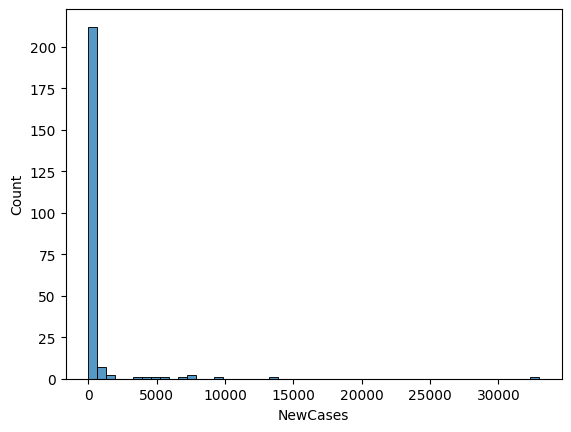

In [296]:
sns.histplot(data=countries_df, x="NewCases",bins=50)

**TotalDeaths**

In [297]:
df = countries_df.loc[countries_df['TotalDeaths'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
229,222.0,NaN,2805,0.0,NaN,NaN,NaN,NaN,2805.0,NaN,"232,471",NaN,NaN,NaN,12066.0,NaN,4.0,NaN,NaN,NaN,NaN,232471.0,2023-02-27
230,223.0,NaN,2166,0.0,NaN,NaN,2.0,NaN,2164.0,NaN,"354,211",NaN,NaN,NaN,6115.0,NaN,3.0,NaN,NaN,NaN,NaN,353884.0,2023-02-27
231,224.0,NaN,1930,0.0,NaN,NaN,1930.0,NaN,0.0,NaN,"545,352",NaN,8632.0,2439107.0,3539.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,2023-02-27
233,226.0,NaN,788,0.0,NaN,NaN,776.0,10.0,12.0,NaN,"485,820",NaN,NaN,NaN,1622.0,NaN,2.0,NaN,NaN,NaN,NaN,7398.0,2023-02-27
235,228.0,NaN,29,0.0,NaN,NaN,29.0,NaN,0.0,NaN,"36,295",NaN,NaN,NaN,799.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,2023-02-27
238,231.0,NaN,5,0.0,NaN,NaN,NaN,NaN,5.0,NaN,"3,628",NaN,NaN,NaN,1378.0,NaN,276.0,NaN,NaN,NaN,NaN,3628.0,2023-02-27


In [298]:
df['Country,Other'].unique()

array([nan])

It seem that these regions do not report the `TotalDeaths`, that is because these are small islands or city. So for further analysis, we would drop these records.

In [299]:
countries_df = countries_df[countries_df['TotalDeaths'].isna()==False]

**NewDeaths**

In [300]:
countries_df['NewDeaths']=countries_df['NewDeaths'].fillna(0)

<Axes: xlabel='NewDeaths', ylabel='Count'>

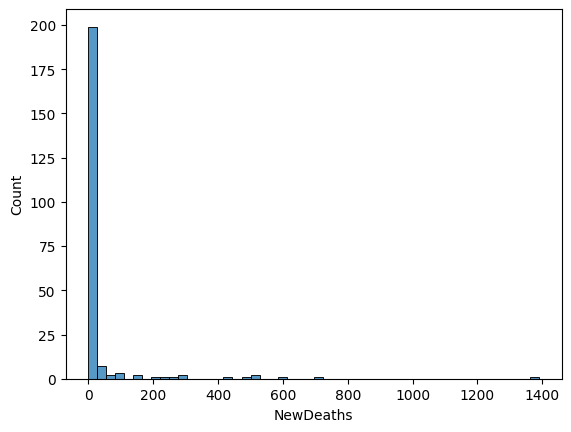

In [301]:
sns.histplot(data=countries_df, x="NewDeaths",bins=50)

**TotalRecovered**

In [302]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,NaN,17042722,0.0,101492.0,0.0,NaN,NaN,NaN,NaN,"199,186",1186.0,162743369.0,1902052.0,85561976.0,NaN,5.0,843.0,10.0,NaN,NaN,1819.0,2023-02-27
74,67.0,NaN,1150793,0.0,29330.0,0.0,NaN,NaN,NaN,44.0,"95,528",2435.0,5001397.0,415169.0,12046656.0,NaN,10.0,411.0,20.0,NaN,NaN,951.0,2023-02-27
86,79.0,NaN,808327,0.0,19870.0,0.0,NaN,NaN,NaN,7.0,"110,641",2720.0,2657506.0,363751.0,7305843.0,NaN,9.0,368.0,30.0,NaN,NaN,12338.0,2023-02-27
102,95.0,NaN,472116,559.0,11111.0,20.0,NaN,NaN,NaN,105.0,"46,190",1087.0,1633222.0,159787.0,10221247.0,NaN,22.0,920.0,60.0,550.0,2.0,32135.0,2023-02-27
119,112.0,NaN,229807,0.0,1098.0,0.0,NaN,NaN,NaN,12.0,"614,314",2935.0,828928.0,2215870.0,374087.0,NaN,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-27
120,113.0,NaN,218015,0.0,758.0,0.0,NaN,NaN,NaN,NaN,"29,142",101.0,1233207.0,164845.0,7481023.0,NaN,34.0,9869.0,60.0,NaN,NaN,28017.0,2023-02-27
122,115.0,NaN,208999,0.0,229.0,0.0,NaN,NaN,NaN,2.0,"605,105",663.0,1996384.0,5780036.0,345393.0,NaN,2.0,1508.0,0.0,NaN,NaN,385315.0,2023-02-27
124,117.0,NaN,201852,0.0,1010.0,0.0,NaN,NaN,NaN,19.0,"504,890",2526.0,938039.0,2346306.0,399794.0,NaN,2.0,396.0,0.0,NaN,NaN,496736.0,2023-02-27
144,137.0,NaN,82227,0.0,1400.0,0.0,NaN,NaN,NaN,NaN,"137,773",2346.0,240907.0,403644.0,596831.0,NaN,7.0,426.0,20.0,NaN,NaN,52112.0,2023-02-27
146,139.0,NaN,77957,0.0,649.0,0.0,NaN,NaN,NaN,7.0,"274,338",2284.0,NaN,NaN,284164.0,NaN,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27


We can fill these null value by this fomula: 

$$TotalRecovered=TotalCases-TotalDeaths-ActiveCases$$

However, these countries do not report ActiveCases too. Fortunately, we know `Active Cases/1M pop`, so we can find `ActiveCases` by this equation: 

$$ActiveCases=Active Cases/1M pop*Population/1000000$$

**ActiveCases**

In [303]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'ActiveCases']=round(df['Active Cases/1M pop']*df['Population']/1000000,1)
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,NaN,503302,0.0,5272.0,0.0,379053.0,NaN,118977.0,7557.0,347,4.0,1.600000e+08,110461.0,1.448471e+09,NaN,2878.0,274748.0,90.0,NaN,NaN,82.0,2023-02-27
9,2.0,NaN,105276823,6894.0,1145556.0,700.0,102654350.0,33706.0,1476917.0,2586.0,"314,442",3422.0,1.166806e+09,3485028.0,3.348053e+08,NaN,3.0,292.0,0.0,210.0,2.0,4411.0,2023-02-27
10,3.0,NaN,44686371,169.0,530771.0,10.0,44153343.0,140.0,2257.0,NaN,"31,768",377.0,9.185351e+08,653003.0,1.406632e+09,NaN,31.0,2650.0,20.0,1.0,NaN,2.0,2023-02-27
11,4.0,NaN,39616580,841.0,164929.0,520.0,39383240.0,4999.0,68411.0,869.0,"604,054",2515.0,2.714902e+08,4139547.0,6.558452e+07,NaN,2.0,398.0,0.0,130.0,8.0,1043.0,2023-02-27
12,5.0,NaN,38144033,32970.0,167951.0,1390.0,37679400.0,17900.0,296682.0,NaN,"454,726",2002.0,1.223324e+08,1458359.0,8.388360e+07,NaN,2.0,499.0,10.0,3930.0,20.0,3537.0,2023-02-27


In [304]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,NaN,17042722,0.0,101492.0,0.0,NaN,NaN,155637.2,NaN,"199,186",1186.0,162743369.0,1902052.0,85561976.0,NaN,5.0,843.0,10.0,NaN,NaN,1819.0,2023-02-27
74,67.0,NaN,1150793,0.0,29330.0,0.0,NaN,NaN,11456.4,44.0,"95,528",2435.0,5001397.0,415169.0,12046656.0,NaN,10.0,411.0,20.0,NaN,NaN,951.0,2023-02-27
86,79.0,NaN,808327,0.0,19870.0,0.0,NaN,NaN,90139.5,7.0,"110,641",2720.0,2657506.0,363751.0,7305843.0,NaN,9.0,368.0,30.0,NaN,NaN,12338.0,2023-02-27
102,95.0,NaN,472116,559.0,11111.0,20.0,NaN,NaN,328459.8,105.0,"46,190",1087.0,1633222.0,159787.0,10221247.0,NaN,22.0,920.0,60.0,550.0,2.0,32135.0,2023-02-27
119,112.0,NaN,229807,0.0,1098.0,0.0,NaN,NaN,228604.9,12.0,"614,314",2935.0,828928.0,2215870.0,374087.0,NaN,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-27
120,113.0,NaN,218015,0.0,758.0,0.0,NaN,NaN,209595.8,NaN,"29,142",101.0,1233207.0,164845.0,7481023.0,NaN,34.0,9869.0,60.0,NaN,NaN,28017.0,2023-02-27
122,115.0,NaN,208999,0.0,229.0,0.0,NaN,NaN,133085.1,2.0,"605,105",663.0,1996384.0,5780036.0,345393.0,NaN,2.0,1508.0,0.0,NaN,NaN,385315.0,2023-02-27
124,117.0,NaN,201852,0.0,1010.0,0.0,NaN,NaN,198592.1,19.0,"504,890",2526.0,938039.0,2346306.0,399794.0,NaN,2.0,396.0,0.0,NaN,NaN,496736.0,2023-02-27
144,137.0,NaN,82227,0.0,1400.0,0.0,NaN,NaN,31102.1,NaN,"137,773",2346.0,240907.0,403644.0,596831.0,NaN,7.0,426.0,20.0,NaN,NaN,52112.0,2023-02-27
146,139.0,NaN,77957,0.0,649.0,0.0,NaN,NaN,43807.9,7.0,"274,338",2284.0,NaN,NaN,284164.0,NaN,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27


In [305]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'TotalRecovered']=df['TotalCases']-df['TotalDeaths']-df['ActiveCases']

<Axes: xlabel='ActiveCases', ylabel='Count'>

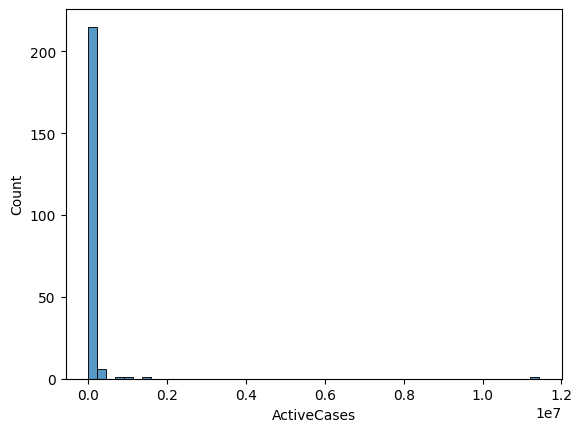

In [306]:
sns.histplot(data=countries_df, x="ActiveCases",bins=50)

**NewRecovered**

In [307]:
countries_df['NewRecovered']=countries_df['NewRecovered'].fillna(0)

<Axes: xlabel='NewRecovered', ylabel='Count'>

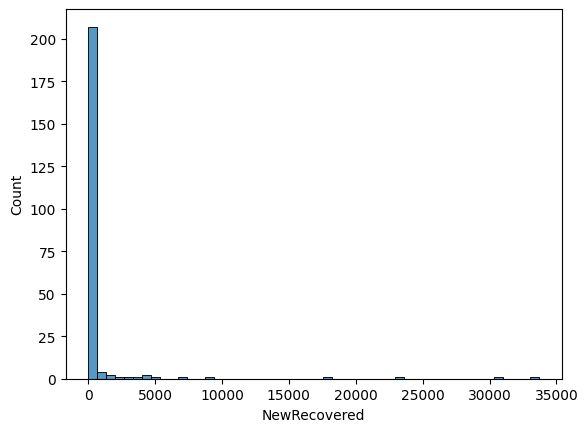

In [308]:
sns.histplot(data=countries_df, x="NewRecovered",bins=50)

**Serious,Critical**

In [309]:
countries_df['Serious,Critical']=countries_df['Serious,Critical'].fillna(0)

<Axes: xlabel='Serious,Critical', ylabel='Count'>

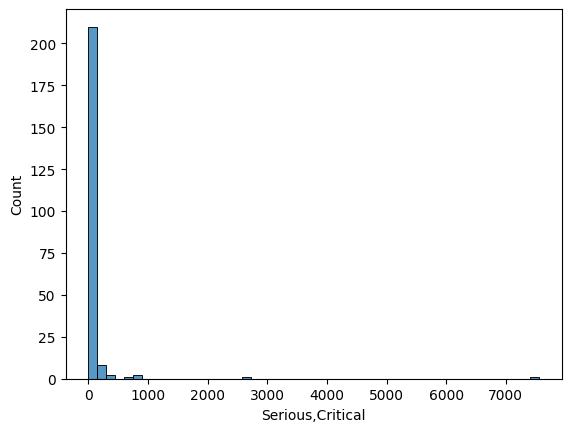

In [310]:
sns.histplot(data=countries_df, x="Serious,Critical",bins=50)

**TotalTests**

In [311]:
df = countries_df.loc[countries_df['TotalTests'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
38,31.0,NaN,4772813,0.0,74.0,0.0,4772739.0,0.0,0.0,0.0,"183,636",3.0,NaN,NaN,25990679.0,NaN,5.0,351225.0,NaN,NaN,NaN,NaN,2023-02-27
146,139.0,NaN,77957,0.0,649.0,0.0,33500.1,0.0,43807.9,7.0,"274,338",2284.0,NaN,NaN,284164.0,NaN,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27
158,151.0,NaN,50665,0.0,172.0,0.0,50440.0,0.0,53.0,0.0,"509,575",1730.0,NaN,NaN,99426.0,NaN,2.0,578.0,NaN,NaN,NaN,533.0,2023-02-27
164,157.0,NaN,42823,0.0,846.0,0.0,200.0,0.0,41777.0,7.0,677,13.0,NaN,NaN,63298550.0,NaN,1478.0,74821.0,NaN,NaN,NaN,660.0,2023-02-27
180,173.0,NaN,24575,0.0,153.0,0.0,16357.3,0.0,8064.7,1.0,"34,077",212.0,NaN,NaN,721159.0,NaN,29.0,4713.0,NaN,NaN,NaN,11183.0,2023-02-27
189,182.0,NaN,18491,0.0,225.0,0.0,4225.0,0.0,14041.0,0.0,"2,728",33.0,NaN,NaN,6779100.0,NaN,367.0,30129.0,NaN,NaN,NaN,2071.0,2023-02-27
191,184.0,NaN,17786,0.0,125.0,0.0,17264.0,0.0,397.0,0.0,"1,786",13.0,NaN,NaN,9957464.0,NaN,560.0,79660.0,NaN,NaN,NaN,40.0,2023-02-27
198,191.0,NaN,15598,0.0,17.0,0.0,15528.0,0.0,53.0,0.0,"259,720",283.0,NaN,NaN,60057.0,NaN,4.0,3533.0,NaN,NaN,NaN,882.0,2023-02-27
211,204.0,NaN,8998,0.0,161.0,0.0,8837.0,0.0,0.0,0.0,"9,916",177.0,NaN,NaN,907419.0,NaN,101.0,5636.0,NaN,NaN,NaN,NaN,2023-02-27
224,217.0,NaN,5013,0.0,18.0,0.0,2703.0,0.0,2292.0,3.0,"40,618",146.0,NaN,NaN,123419.0,NaN,25.0,6857.0,NaN,NaN,NaN,18571.0,2023-02-27


It is easy to recognize that all of countries are isolated due to polital conditions, war, poverty or isolation. For instance, `Diamond Princess` and `MS Zaandam` are luxury cruise ships, which had experienced a big virus transmission at the early stage of the Covid-19 pandemic. For further analysis, we would drop these records.

In [312]:
countries_df = countries_df[countries_df['TotalTests'].isna()==False]

**Population**

<Axes: xlabel='Population', ylabel='Count'>

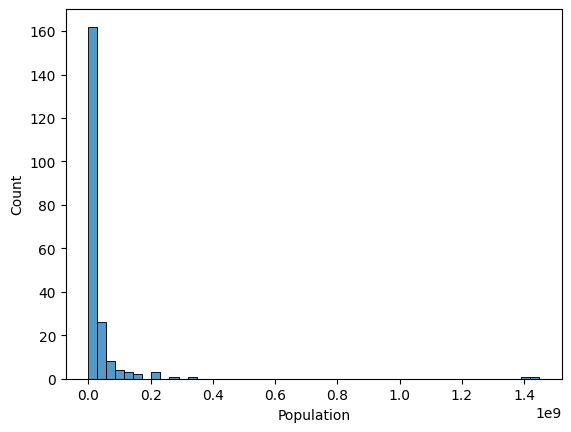

In [313]:
sns.histplot(data=countries_df, x="Population",bins=50)

**New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**

In [314]:
columns = ['New Cases/1M pop','New Deaths/1M pop','Active Cases/1M pop']

In [315]:
countries_df[columns]=countries_df[columns].fillna(0)

<Axes: xlabel='New Cases/1M pop', ylabel='Count'>

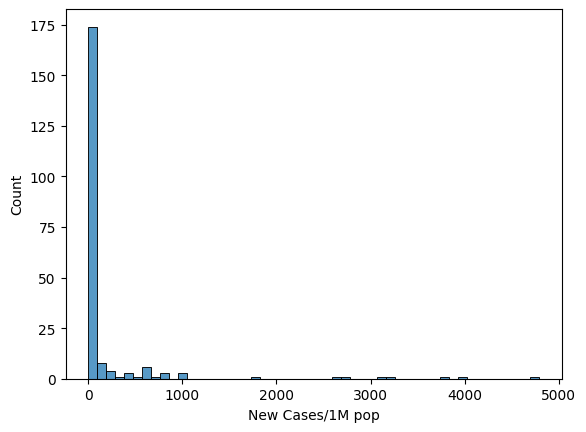

In [316]:
sns.histplot(data=countries_df, x="New Cases/1M pop",bins=50)

<Axes: xlabel='New Deaths/1M pop', ylabel='Count'>

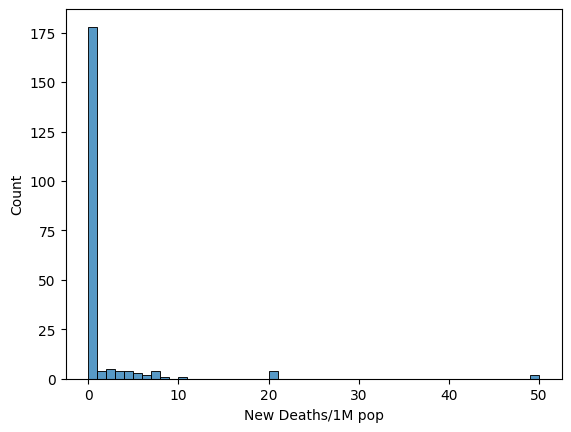

In [317]:
sns.histplot(data=countries_df, x="New Deaths/1M pop",bins=50)

<Axes: xlabel='Active Cases/1M pop', ylabel='Count'>

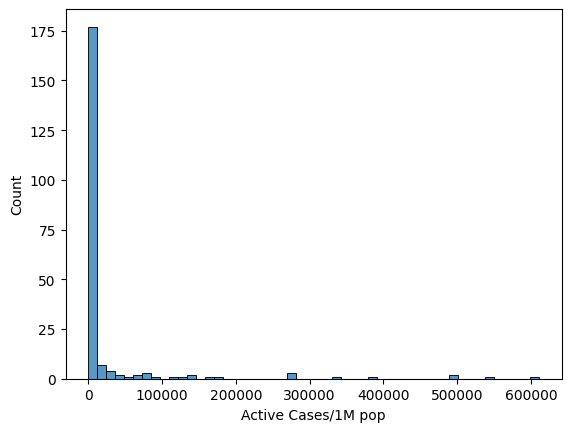

In [318]:
sns.histplot(data=countries_df, x="Active Cases/1M pop",bins=50)

It is awesome that there are no missing value now.

In [319]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,212.0,1.090896e+02,6.385311e+01,1.0,54.75,107.5,163.25,2.250000e+02,0.0
"Country,Other",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,212.0,3.183122e+06,9.940184e+06,1403.0,36815.75,269016.5,1466371.50,1.052768e+08,0.0
NewCases,212.0,5.295896e+02,2.735008e+03,0.0,0.00,0.0,26.00,3.297000e+04,0.0
TotalDeaths,212.0,3.206255e+04,1.090582e+05,1.0,294.75,2869.0,16863.75,1.145556e+06,0.0
NewDeaths,212.0,3.325472e+01,1.366466e+02,0.0,0.00,0.0,0.00,1.390000e+03,0.0
TotalRecovered,212.0,3.055399e+06,9.616853e+06,104.1,25486.50,242543.5,1457077.25,1.026544e+08,0.0
NewRecovered,212.0,7.421132e+02,3.803914e+03,0.0,0.00,0.0,13.25,3.370600e+04,0.0
ActiveCases,212.0,9.566522e+04,7.960550e+05,0.0,83.75,1737.0,13676.50,1.143434e+07,0.0
"Serious,Critical",212.0,8.182075e+01,5.547821e+02,0.0,0.00,2.0,20.00,7.557000e+03,0.0


**Values distribution of Catergorial columns**

In [320]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Tot Cases/1M pop,Date
missing_percentage,0.0,0.0
num_values,212,1
value_percentages,"{'347': 0.5, '4,394': 0.5, '137,773': 0.5, '274,568': 0.5, '62,625': 0.5, '92,017': 0.5, '171,66...",{2023-02-27: 100.0}


In [321]:
# sns.countplot(x=countries_df['Continent'])
# plt.xticks(rotation=90)
# plt.show()

<a class="anchor" id="3.1"></a>
# Question 1: <center>Which countries have had high newcases? Why?</center> 
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. [Year analysis](#3.1.1)
2. [CGPA analysis](#3.1.2)
3. [Age analysis](#3.1.3)
4. [Major analysis](#3.1.4)
5. [Marital Status Analysis](#3.1.5)
6. [Modeling](#3.1.6)
7. [Conclusion](#3.1.7)

# Continents

In [322]:
big_df2 = pd.read_csv('Date2023-02-27.csv')
big_df2.head()

big_df2[columns] = big_df2[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

continents_df2 = big_df2[(big_df2['#'].isna())&((big_df2['Country,Other']!='Total:')\
                                             &(big_df2['Country,Other']!='\n\n'))&(big_df2['Continent']!='All')]
continents_df2.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\r\nAsia\r\n,"214,275,435","+21,169","1,536,461",157.0,"198,909,142","+28,708","13,829,832","15,497",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
1,NaN,\r\nNorth America\r\n,"124,580,169","+16,947","1,611,268",149.0,"119,787,772","+43,175","3,181,129","7,750",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
2,NaN,\r\nEurope\r\n,"246,227,059","+55,613","2,016,755",297.0,"241,811,330","+45,101","2,398,974","6,459",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
3,NaN,\r\nSouth America\r\n,"67,991,811","+15,796","1,350,520",92.0,"66,251,241","+38,668","390,050","10,186",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
4,NaN,\r\nOceania\r\n,"13,996,291","+1,297","26,116",6.0,"13,834,558","+1,186","135,617",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-27


**Values distribution of Numeric columns**

In [323]:
df = continents_df2.describe().T
df['missing_percentage'] = ((1-df['count']/len(continents_df2)) * 100).round(1)
df


,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
NewDeaths,6.0,117.5,110.215698,4.0,27.5,120.5,155.0,297.0,14.3
1 Testevery X ppl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
New Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
New Deaths/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
Active Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Drop unrelevant columns**

In [329]:
columns = ['#','Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
        'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop', 'New Deaths/1M pop', '1 Testevery X ppl', 'Tests/\r\n1M pop\r\n']

# drop unrelevant columns
df = continents_df2.drop(columns=columns)
# drop rows with missing values
df = df.dropna()
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Continent,Date
0,\r\nAsia\r\n,"214,275,435","+21,169","1,536,461",157.0,"198,909,142","+28,708","13,829,832","15,497",Asia,2023-02-27
1,\r\nNorth America\r\n,"124,580,169","+16,947","1,611,268",149.0,"119,787,772","+43,175","3,181,129","7,750",North America,2023-02-27
2,\r\nEurope\r\n,"246,227,059","+55,613","2,016,755",297.0,"241,811,330","+45,101","2,398,974","6,459",Europe,2023-02-27
3,\r\nSouth America\r\n,"67,991,811","+15,796","1,350,520",92.0,"66,251,241","+38,668","390,050","10,186",South America,2023-02-27
4,\r\nOceania\r\n,"13,996,291","+1,297","26,116",6.0,"13,834,558","+1,186","135,617",64,Australia/Oceania,2023-02-27
5,\r\nAfrica\r\n,"12,793,643","+1,451","258,581",4.0,"12,075,067",+483,"459,995",547,Africa,2023-02-27


**New Cases**

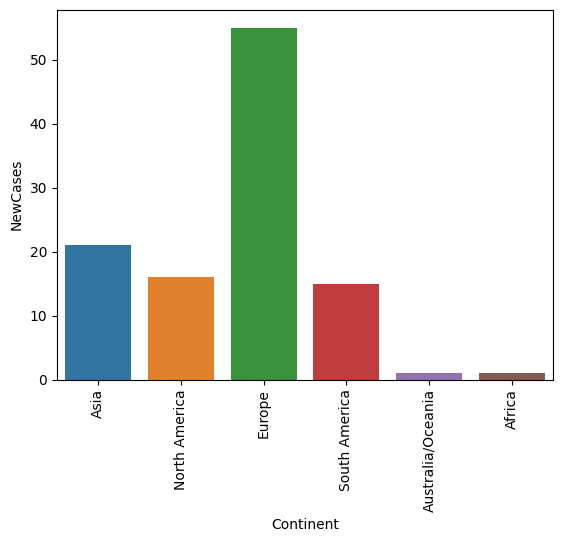

In [335]:
# New Case
# evaluate the "+" before the number
df['NewCases'] = df['NewCases'].str.extract('(\d+)')
# convert to numeric
df['NewCases'] = pd.to_numeric(df['NewCases'])
# fill missing values with 0
df['NewCases'] = df['NewCases'].fillna(0)
# bar plot
sns.barplot(x='Continent', y='NewCases', data=df)
plt.xticks(rotation=90)
plt.show()


**New Deaths**

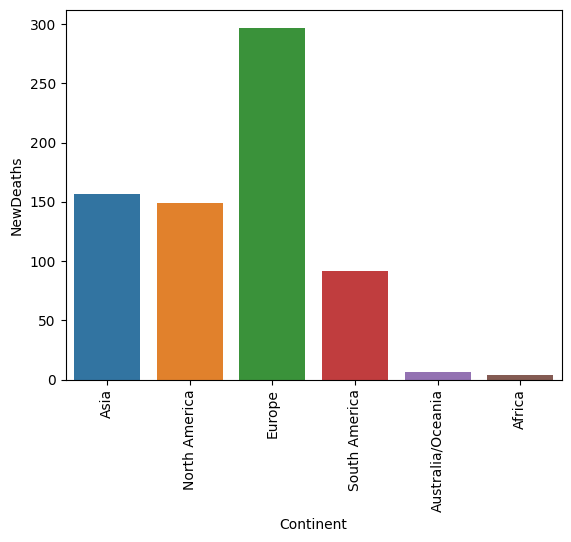

In [336]:
# NewDeaths
df['NewDeaths']=df['NewDeaths'].fillna(0)
# bar plot
sns.barplot(x=df['Continent'], y=df['NewDeaths'])
plt.xticks(rotation=90)
plt.show()


**TotalCases**

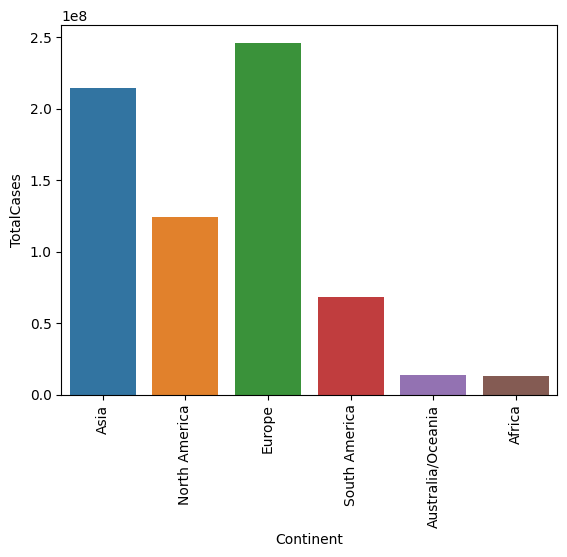

In [341]:
# change the type of TotalCases to numeric
# use long()
df['TotalCases'] = df['TotalCases'].apply(lambda x: int(x.replace(',','')))
# bar plot
sns.barplot(x=df['Continent'], y=df['TotalCases'])
plt.xticks(rotation=90)
plt.show()



**Total Deaths**

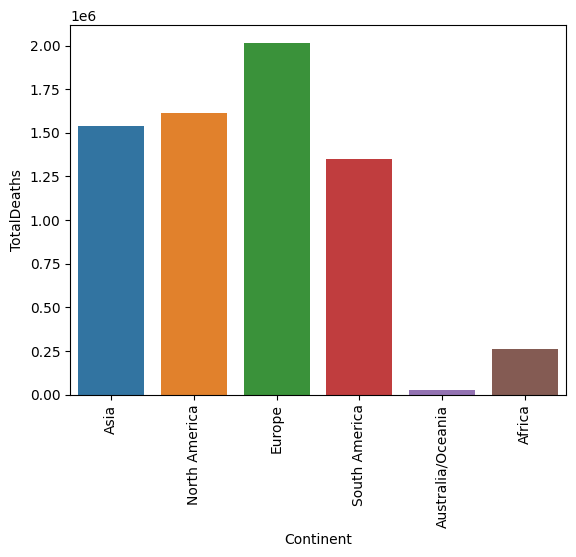

In [342]:
# TotalDeaths
# replace the "," in the number
df['TotalDeaths'] = df['TotalDeaths'].apply(lambda x: int(x.replace(',','')))
# bar plot
sns.barplot(x=df['Continent'], y=df['TotalDeaths'])
plt.xticks(rotation=90)
plt.show()



**Values distribution of Catergorial columns**

In [349]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Tot Cases/1M pop,Date
missing_percentage,0.0,0.0
num_values,212,1
value_percentages,"{'347': 0.5, '4,394': 0.5, '137,773': 0.5, '274,568': 0.5, '62,625': 0.5, '92,017': 0.5, '171,66...",{2023-02-27: 100.0}


<a class="anchor" id="3.2"></a>
# Question 2. <center>What are the current trends of covid pandemic among continents?</center> 

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **Mental health issues analysis**
2. **Preprocessing**
3. **Visualization**
4. **Modeling**

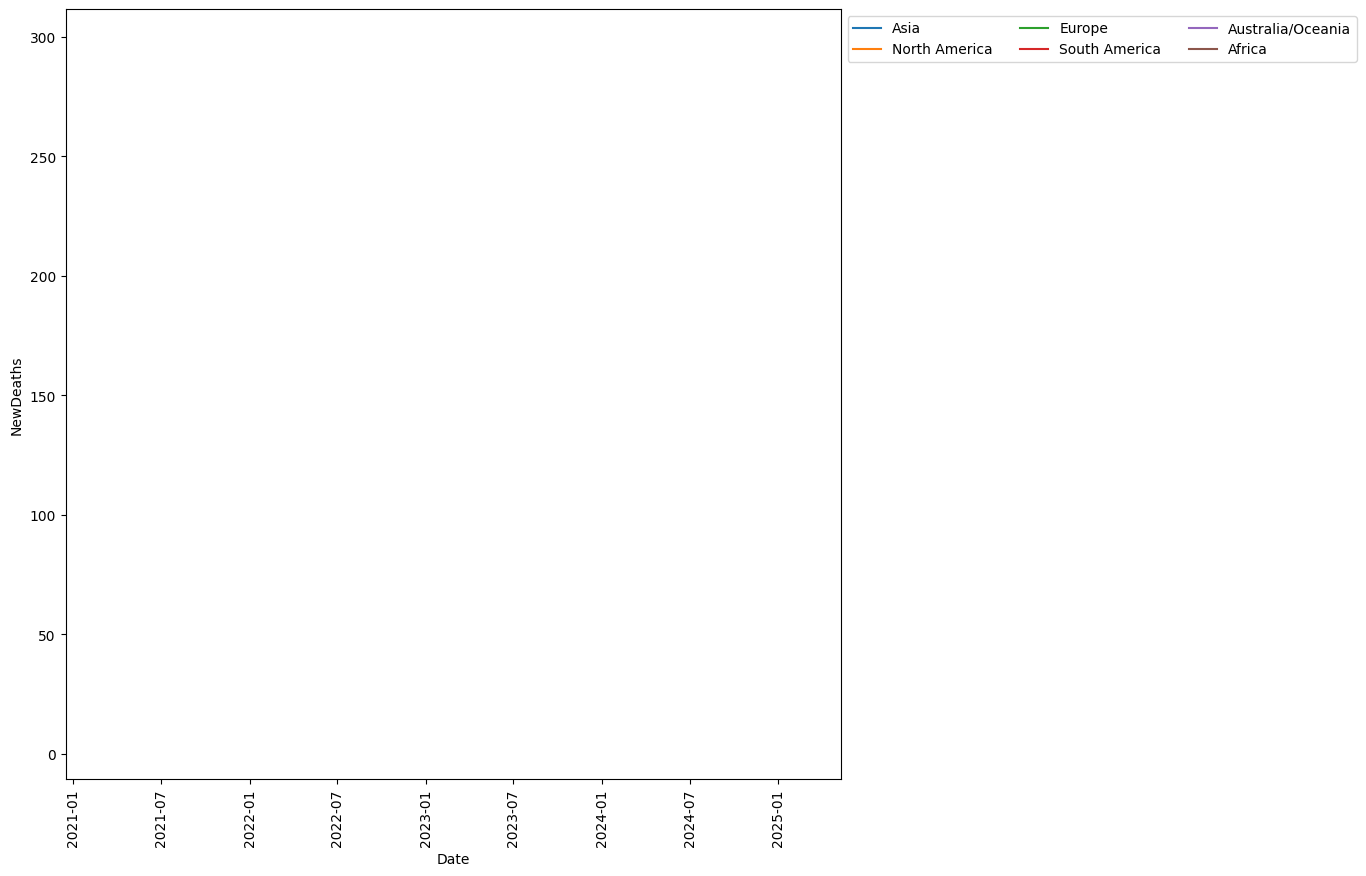

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="NewDeaths",
             hue="Continent", data=continents_df)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.,
        20089.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01')])

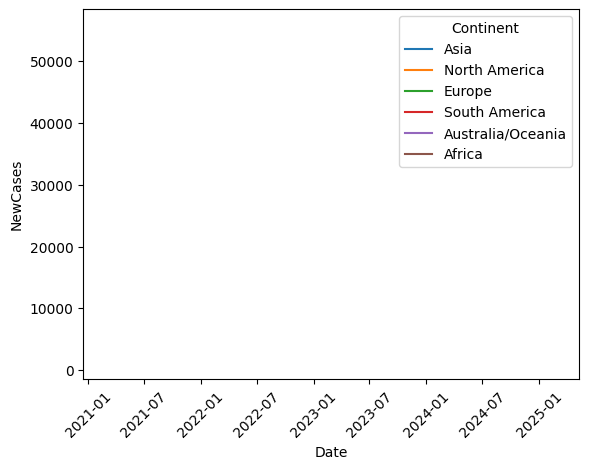

In [ ]:
sns.lineplot(x="Date", y="NewCases",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.,
        20089.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01')])

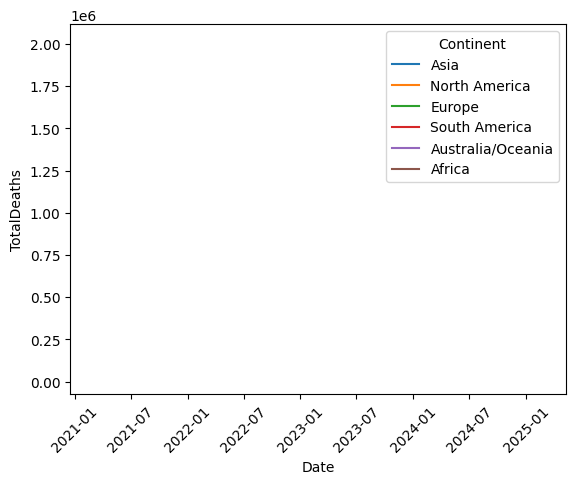

In [ ]:
sns.lineplot(x="Date", y="TotalDeaths",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

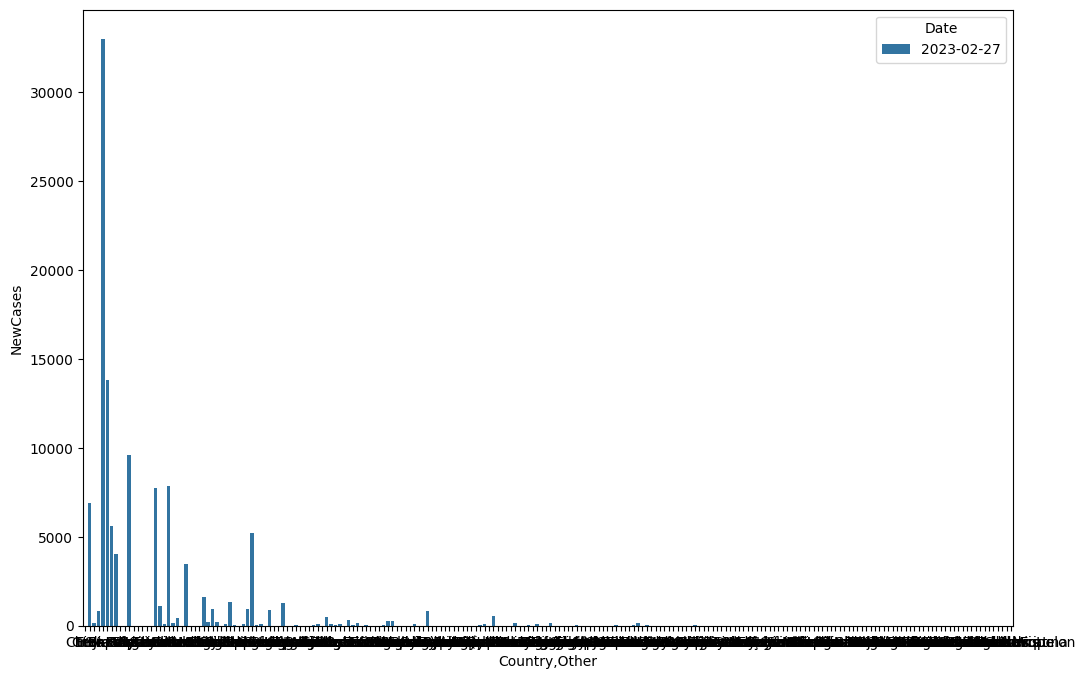

In [ ]:
f = plt.figure(figsize=(12, 8))
fig = sns.barplot(data=countries_df, x = 'Country,Other', y = 'NewCases',hue='Date')

In [ ]:
df = countries_df[countries_df['Date']==datetime.date.today()]

NameError: name 'datetime' is not defined

In [ ]:
world_df = big_df[big_df['Country,Other']=='World']
world_df.head()

In [ ]:
df = world_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

In [ ]:
world_df.drop(columns=['TotalTests','Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl','1 Testevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop','#', 'New Deaths/1M pop'],inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df